# Homework 6 (30 marks)
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW6_lastname_firstname.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission.

NOTE: Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 04/09/2021 (Friday).

Please ensure you follow all the steps mentioned in the homework.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below -

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name'))

Import all the libraries you require in the cell below.



In [ ]:
# Enter your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris

### 1. Build a classification model that predicts the edibility of mushrooms (class variable in the dataset). You have been provide with a dataset as a mushrooms.csv file. 
Here is a description of the attributes


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy (8 marks)

A. Read the dataset, explore it and determine what is the dependent variable (1 mark)

B. Store the feature and target variable. (2 marks)

C. Convert all categorical variables into dummy variables (1 mark)

D. Partition the data into training and test sets (70/30) (1 mark)

E. Fit the training data to a classification tree. (3 marks)

In [ ]:
# Enter your code here
mushframe = pd.read_csv("mushrooms.csv")
mushframe.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


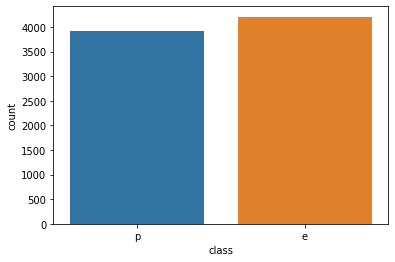

In [ ]:
sns.countplot(x='class', data=mushframe)
plt.show()
#A
#dependent variable is class. This classifies the mushroom as poisonous or edible (edibility)

In [ ]:
mushframe.isnull().any()
mushframe.isnull().sum()
mushframe.dropna(inplace = True)
#No missing values

In [ ]:
#B
X = mushframe[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']]
y = mushframe['class']

In [ ]:
#C
mushframe1 = mushframe.copy()
mushframe1 = pd.get_dummies(mushframe1,
                     columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])
  
display(mushframe1)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,e,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,e,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,e,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8120,e,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8121,e,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8122,p,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
#D
y = mushframe1['class'] 
X = mushframe1.iloc[:, 1:]
print(mushframe1.shape)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=2020
                                                    )

(8124, 118)
(8124, 117)
(8124,)


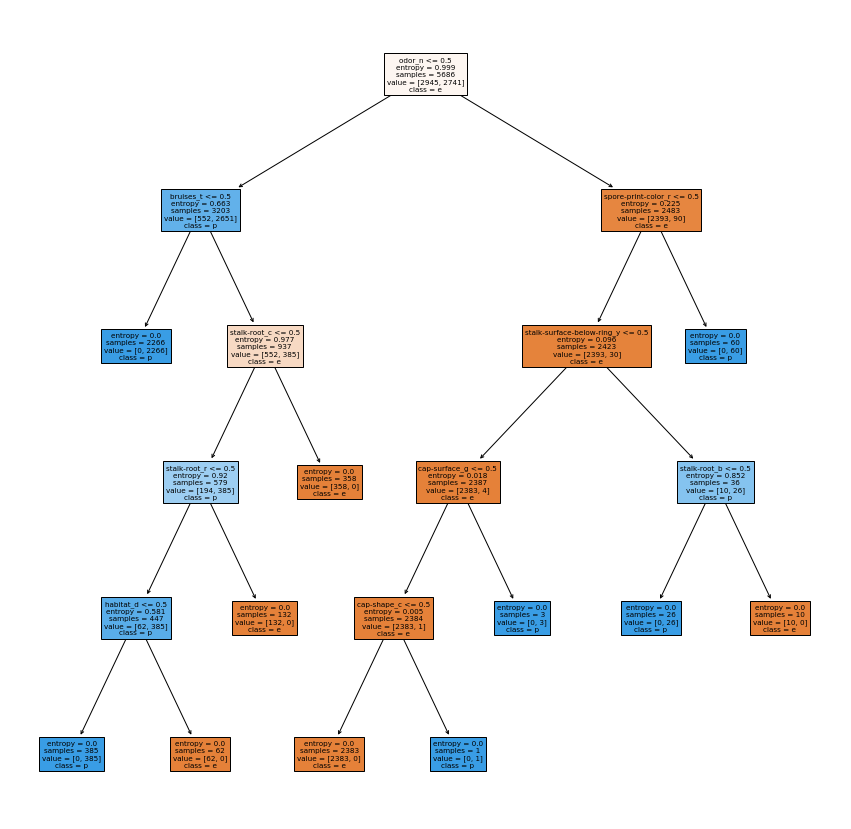

In [ ]:
#E
dt = DecisionTreeClassifier(max_depth=6, criterion="entropy", random_state=2020)
dt.fit(X_train,y_train)
ypred = dt.predict((X_test))

fn = X.columns

plt.figure(figsize=(15,15))
classList = list(map(str,dt.classes_.tolist()))
a = tree.plot_tree(dt, feature_names=fn, class_names=classList, filled=True)
plt.show()

2. Print the confusion matrix. 
Also visualize the confusion matrix using plot_confusion_matrix from sklearn.metrics (3 marks)



[[1263    0]
 [   3 1172]]


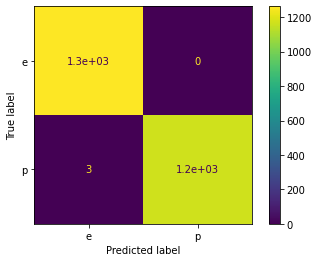

In [ ]:
# Enter your code here
predictions = dt.predict(X_test)
print(confusion_matrix(y_test, predictions))

metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

3. Print the accuracy on the training partition?  (2 marks)


In [ ]:
# Enter your code here
model_bagging = BaggingClassifier(random_state = 2020)
model_bagging.fit(X_test, y_test)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy Train = ', acc_bagging)


 Accuracy Train =  1.0


4. Print the accuracy on the test partition? (2 marks)


In [ ]:
# Enter your code here
model_bagging = BaggingClassifier(random_state = 2020)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy Test = ', acc_bagging)

 Accuracy Test =  0.9987694831829368


5. Show the classification tree and save it (5 marks)


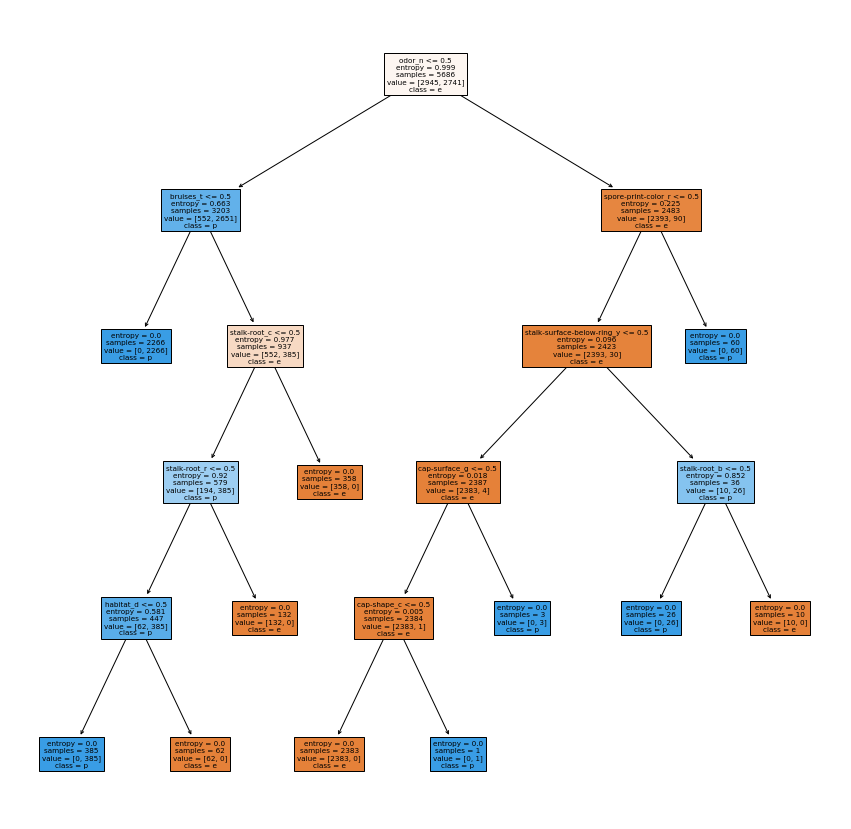

In [ ]:
# Enter your code here
plt.figure(figsize=(15,15))
classList = list(map(str,dt.classes_.tolist()))
a = tree.plot_tree(dt, feature_names=fn, class_names=classList, filled=True)
plt.show()

6. Find and print the top three most important features in your decision tree for determining toxicity. (4 marks)

In [ ]:
# Enter your code here
importance = dt.feature_importances_
imp = pd.DataFrame(zip(X_train.columns, dt.feature_importances_)).sort_values(by=[1],ascending=False)
imp.head()
#Top three most important features (1 is best): 1) odor_n 2) bruises_t 3) stalk-root_c

,0,1
27,odor_n,0.527899
21,bruises_t,0.212695
53,stalk-root_c,0.067373
100,spore-print-color_r,0.057232
55,stalk-root_r,0.048067


7. Classify the following mushroom. (6 marks)

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [ ]:
# Enter your code here
mushroom1 = {'class':'?', 'cap-shape':'x', 'cap-surface':'s', 'cap-color':'n', 'bruises':'t', 'odor':'y', 'gill-attachment':'f', 'gill-spacing':'c', 'gill-size':'n', 
             'gill-color':'k', 'stalk-shape':'e', 'stalk-root':'e', 'stalk-surface-above-ring':'s', 'stalk-surface-below-ring':'s', 'stalk-color-above-ring':'w', 'stalk-color-below-ring':'w', 
             'veil-type':'p', 'veil-color':'w', 'ring-number':'o', 'ring-type':'p', 'spore-print-color':'r', 'population':'s', 'habitat':'u'}
mushframe2 = pd.DataFrame.from_dict(mushroom1,orient='index')
mushframe2 = pd.get_dummies(mushframe2)
print(mushframe2)
pred1 = dt.predict(mushframe2)
print(pred1)

#I could not figure out how to properly configure the data points to match the original read csv file for prediction. 
#These are the steps I did for partial credit if possible:
#1) Created a dictionary based on the data points
#2) Transformed the dictionary into a dataframe
#3) get_dummies for the new dataframe (dummy variable inputs)
#4) Execute dt.predict of the new dataframe. (I understand it is not working because the new dataframe does not match the layout of the original dataframe that the model is built for)

                          0_?  0_c  0_e  0_f  0_k  ...  0_t  0_u  0_w  0_x  0_y
class                       1    0    0    0    0  ...    0    0    0    0    0
cap-shape                   0    0    0    0    0  ...    0    0    0    1    0
cap-surface                 0    0    0    0    0  ...    0    0    0    0    0
cap-color                   0    0    0    0    0  ...    0    0    0    0    0
bruises                     0    0    0    0    0  ...    1    0    0    0    0
odor                        0    0    0    0    0  ...    0    0    0    0    1
gill-attachment             0    0    0    1    0  ...    0    0    0    0    0
gill-spacing                0    1    0    0    0  ...    0    0    0    0    0
gill-size                   0    0    0    0    0  ...    0    0    0    0    0
gill-color                  0    0    0    0    1  ...    0    0    0    0    0
stalk-shape                 0    0    1    0    0  ...    0    0    0    0    0
stalk-root                  0    0    1 

ValueError: ignored